In [1]:
import numpy as np
import pandas as pd
# import matplotlib as mpl
# import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {'figure.figsize':(16,9)})
nds_teal = '#037F9B'

In [2]:
pnl = pd.read_csv('data/mev-pnl.csv')
pnl['margin'] = pnl['pnl'] / pnl['gross_profit']
pnl['week_id'] = pnl['block_number'] // 44000

In [3]:
pnl.sample(5)

,hash,block_number,index,status,pnl_heuristic,gross_profit,miner_tip,tx_cost,pnl,calldata,margin,week_id
205,0x6c388fde6bd07d56f6b120f50934cb1ac116cc4db76ecfa0afd2fcdac737a3f1,13653130,9,1,2,0.017404,0.004020,0.010497,0.002887,0x04236cf531efc4aeaa7c39e54a33fdc3c46ee2bd70ae0a09000003649b151a...,0.165894,310
79,0x2ea0aac4ac72e9667a4b51927703587aa97838fe4dabca155408fc866c62b520,13605206,3,1,2,0.025347,0.005196,0.018276,0.001875,0x04236cf531efc4aeaa7c39e54a33fdc3c46ee2bd70ae0a09000003649b151a...,0.073976,309
202,0x6b9dfbb4b8c4ddc097a85b86055f7efaef5817648667fb8f5cf23fafa417d408,13634309,0,1,2,0.441175,0.208676,0.039843,0.192657,0x04236cf5c75a99fa00803896349891f8471da3614bd07564000000043850c7...,0.436690,309
357,0xd3b4f95d9e8d0bde399c6c151f89737493d159994908acb985e93d70485fdfb6,13715539,0,1,2,0.020105,0.002835,0.014640,0.002630,0x04236cf531efc4aeaa7c39e54a33fdc3c46ee2bd70ae0a09000003649b151a...,0.130824,311
374,0xdeebcefff1539c59bbf21deea731396cc7921f9392cddf133e9341c6f2e09b53,13729718,1,1,2,0.015654,0.003006,0.010152,0.002497,0x04236cf531efc4aeaa7c39e54a33fdc3c46ee2bd70ae0a09000003649b151a...,0.159498,312


# How much profit does each bot tx make? 

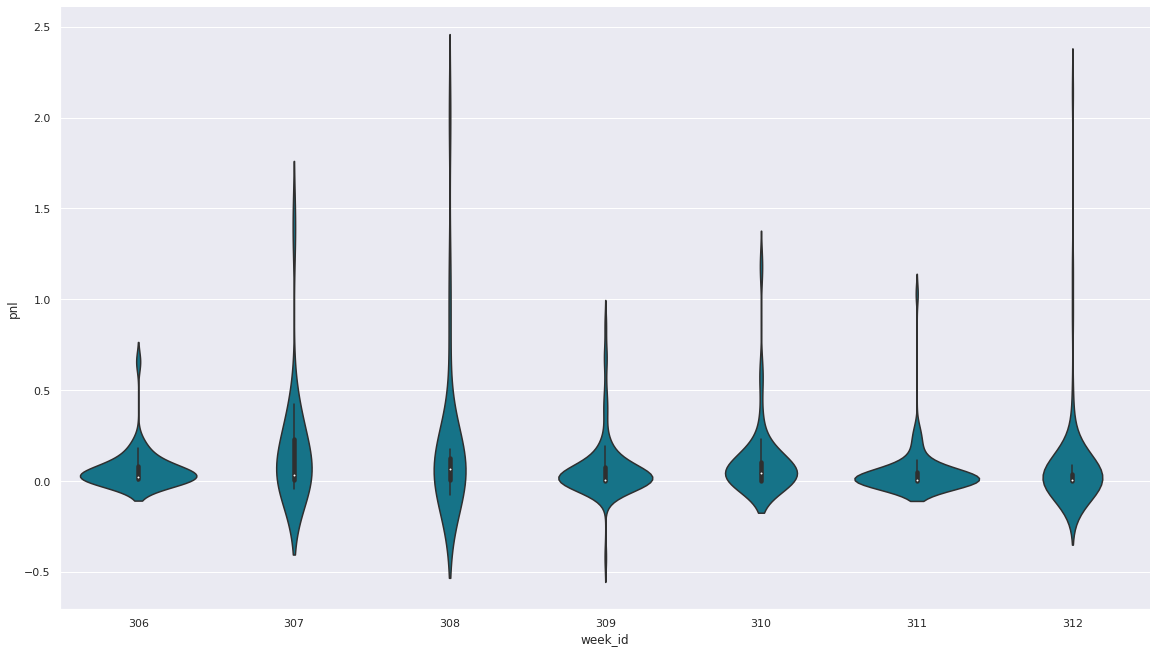

In [4]:
sns.catplot(data=pnl, x="week_id", y='pnl', kind="violin", color=nds_teal,
            height=9, aspect=16/9)

# How much profit does the bot make per week? 

<AxesSubplot:xlabel='week_id', ylabel='pnl'>

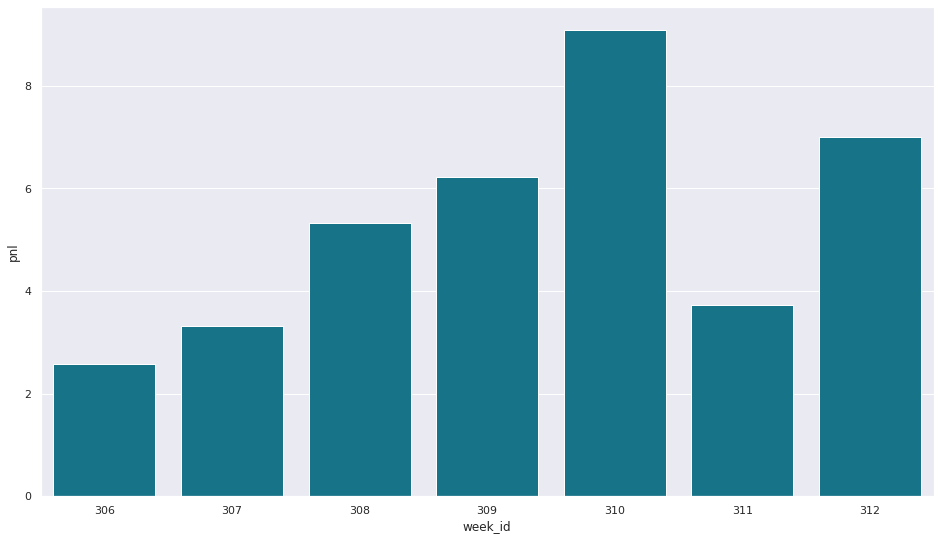

In [5]:
sns.barplot(data=pnl, x='week_id', y='pnl', estimator=sum, ci=None, color=nds_teal)

# How much gross profit goes to the miners?  

<AxesSubplot:xlabel='miner_tip', ylabel='pnl'>

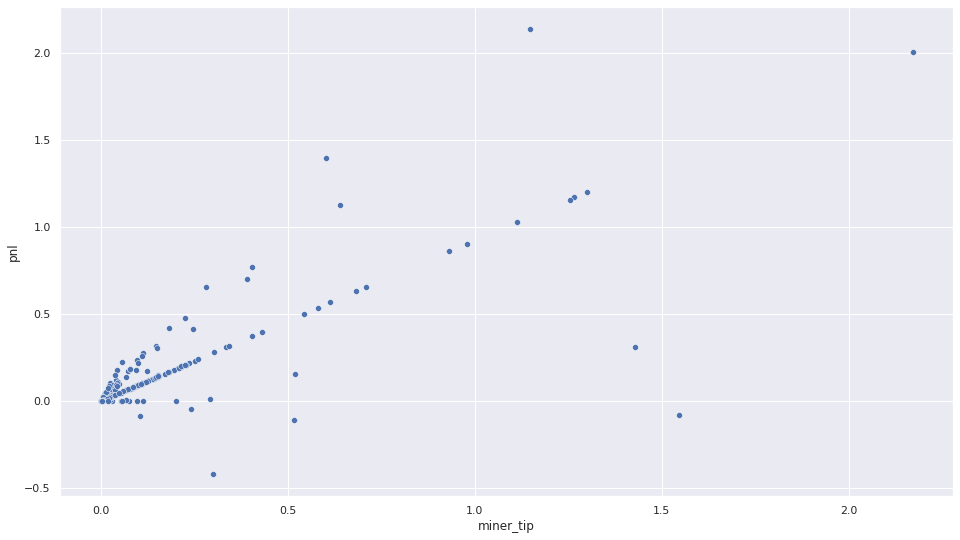

In [6]:
sns.scatterplot(data=pnl, x='miner_tip', y='pnl')

# How consistent is the profitability? 

<AxesSubplot:xlabel='block_number', ylabel='pnl'>

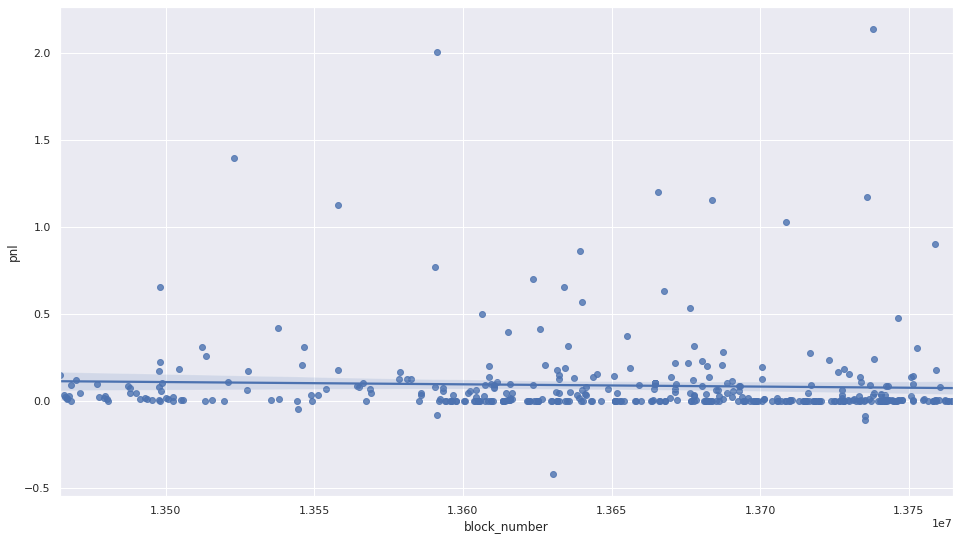

In [8]:
sns.regplot(data=pnl, x="block_number", y='pnl')